In [3]:
%matplotlib inline
from matplotlib import style, figure
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables


In [9]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [10]:
# Save references to each table
measurement = Base.classes.measurement
station= Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [13]:
import matplotlib.ticker as ticker
import matplotlib.dates as DateFormatter

Date latest is ('2017-08-23',)Twelve Months ago is 2016-8-23.


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 <a list of 11 Text xticklabel objects>)

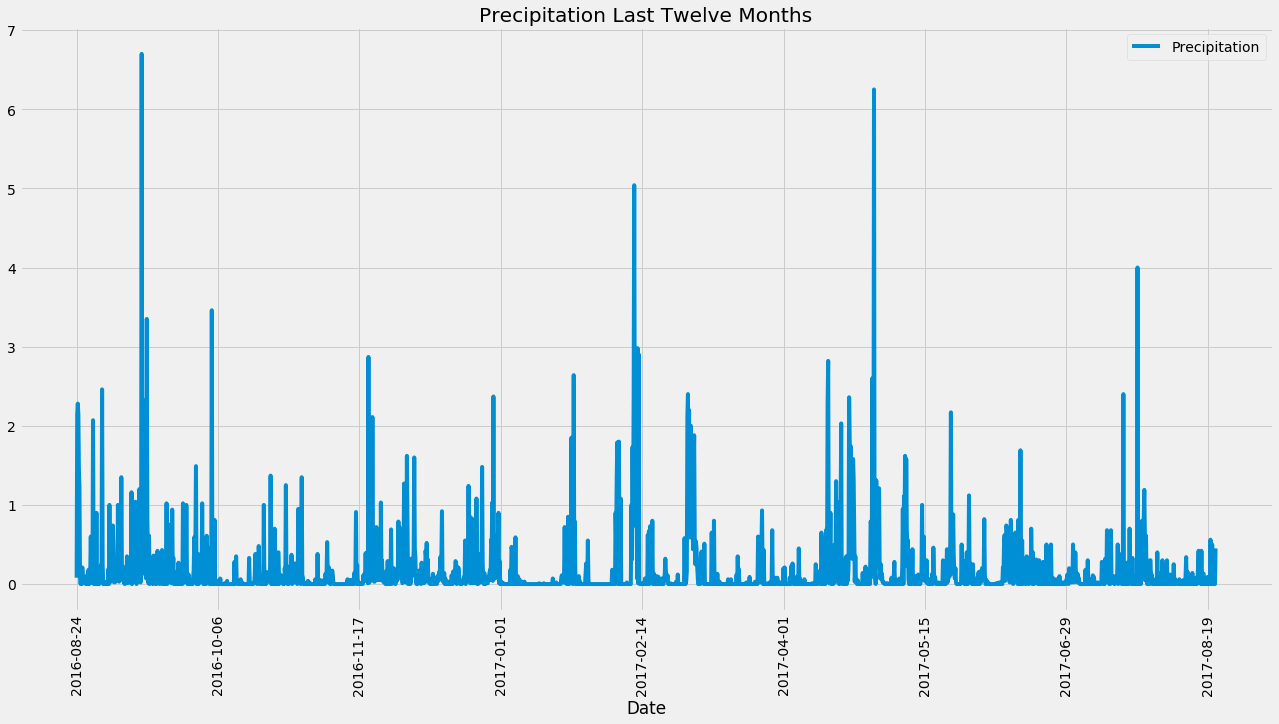

In [14]:
date_latest = session.query(func.max(measurement.date))
for date in date_latest:
    print(f'Date latest is {date}'+f'Twelve Months ago is 2016-8-23.')

pcpt_12mth_q = session.query(measurement.prcp, measurement.date).filter(measurement.date>'2016-08-23').all()
pcpt_12mth=pd.DataFrame(pcpt_12mth_q, columns =['Precipitation', 'Date']) 
pcpt_12mth=pcpt_12mth.set_index('Date')
pcpt_12mth=pcpt_12mth.sort_values('Date',ascending=True)
pcpt_12mth=pcpt_12mth.dropna()
fig12 =pcpt_12mth.plot(figsize=(20, 10), title ='Precipitation Last Twelve Months')
plt.xticks(rotation='vertical')

In [15]:
pcpt_12mth

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
######WHAT EXACTLY DO YOU WANT?
count_pcpt= pcpt_12mth.groupby('Date').count()
sum_pcpt= pcpt_12mth.groupby('Date').sum()
ave_pcpt= pcpt_12mth.groupby('Date').mean()
var_pcpt= pcpt_12mth.groupby('Date').var()
std_pcpt= pcpt_12mth.groupby('Date').std()
sem_pcpt= pcpt_12mth.groupby('Date').sem()
summary_pcpt_12mth=pd.DataFrame({'Count': count_pcpt['Precipitation'],
                                'Average': ave_pcpt['Precipitation'],
                                'Variance': var_pcpt['Precipitation'],
                                'StDeviation':  std_pcpt['Precipitation'],
                                'SEM':  sem_pcpt['Precipitation']})

summary_pcpt_12mth
pcpt_12mth.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
summary_pcpt_12mth

,Count,Average,Variance,StDeviation,SEM
Date,,,,,
2016-08-24,6,1.555000,0.706510,0.840541,0.343150
2016-08-25,7,0.077143,0.005157,0.071813,0.027143
2016-08-26,6,0.016667,0.000267,0.016330,0.006667
2016-08-27,5,0.064000,0.006680,0.081731,0.036551
2016-08-28,6,0.516667,0.620427,0.787672,0.321566
...,...,...,...,...,...
2017-08-19,3,0.030000,0.002700,0.051962,0.030000
2017-08-20,2,0.005000,0.000050,0.007071,0.005000
2017-08-21,3,0.193333,0.100933,0.317700,0.183424


In [18]:
# Design a query to show how many stations are available in this dataset?
t_station = session.query(func.count(station.station)).all()
t_station

[(9)]

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# most_max = session.query(measurement.station, func.count(measurement.prcp) ).filter(func.max(measurement.prcp)).all()
acts_station=session.query(func.count(measurement.prcp) , measurement.station).group_by(measurement.station).all()
acts_station=pd.DataFrame(acts_station, columns =['Activity', 'Station']) 
acts_station=acts_station.set_index('Station')
acts_station=acts_station.sort_values('Activity', ascending=False)
acts_station.index[0]

'USC00519281'

In [20]:
name_station=session.query(measurement.station).group_by(measurement.station).all()
print(name_station)

[('USC00511918',), ('USC00513117',), ('USC00514830',), ('USC00516128',), ('USC00517948',), ('USC00518838',), ('USC00519281',), ('USC00519397',), ('USC00519523',)]


In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
max_temp_mostactive=session.query( measurement.station, func.max(measurement.tobs)).filter(measurement.station=='USC00519281').all()
min_temp_mostactive=session.query( measurement.station, func.min(measurement.tobs)).filter(measurement.station=='USC00519281').all()
ave_temp_mostactive=session.query( measurement.station, func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
obs_station=session.query(func.count(measurement.tobs) , measurement.station).group_by(measurement.station).all()
obs_station=pd.DataFrame(obs_station, columns =['Observation', 'Station']) 
obs_station=obs_station.set_index('Station')
obs_station=obs_station.sort_values('Observation', ascending=False)
obs_station.index[0]

'USC00519281'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218D3324EC8>]],
      dtype=object)

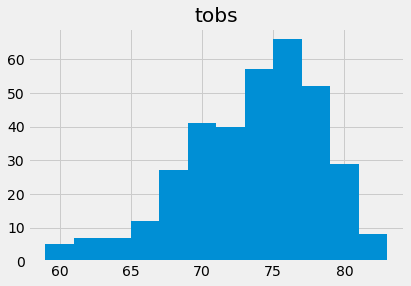

In [23]:
spe_station=session.query(measurement.tobs).filter(measurement.station=='USC00519281', measurement.date>'2016-08-23').all()
spe_station=pd.DataFrame(spe_station)
spe_station.hist(bins=12)

For Flask


In [33]:
from flask import jsonify
import json

In [43]:
pcpt_12mth_json = json.dumps(pcpt_12mth_q, indent = 8) 

# Writing to 1960s.json 
with open("pcpt_12mth.json", "w") as outfile: 
    outfile.write(pcpt_12mth_json) 
pcpt_12mth.to_csv('pcpt_12mth.csv')
# with open("pcpt_12mth.csv", "w") as outfile: 
#     outfile.write(pcpt_12mth_q) 

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
